Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables, they are considering and the number of independent variables being used.

![Linear Regression](Images/Linear_reg.png)

Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression.
In the figure above, X (input) is the work experience and Y (output) is the salary of a person. The regression line is the best fit line for our model.

![Hypothesis fucntion](Images/hypo_function.png)

While training the model we are given :
x: input training data (univariate – one input variable(parameter))
y: labels to data (supervised learning)

When training the model – it fits the best line to predict the value of y for a given value of x. The model gets the best regression fit line by finding the best θ1 and θ2 values.
θ1: intercept
θ2: coefficient of x

Once we find the best θ1 and θ2 values, we get the best fit line. So when we are finally using our model for prediction, it will predict the value of y for the input value of x.

How to update θ1 and θ2 values to get the best fit line ?

Cost Function (J):
By achieving the best-fit regression line, the model aims to predict y value such that the error difference between predicted value and true value is minimum. So, it is very important to update the θ1 and θ2 values, to reach the best value that minimize the error between predicted y value (pred) and true y value (y).

![Minimziing Error](Images/Minimize.png)
![Cost fucntion](Images/cost_func.png)

Cost function(J) of Linear Regression is the Root Mean Squared Error (RMSE) between predicted y value (pred) and true y value (y).

Gradient Descent:
To update θ1 and θ2 values in order to reduce Cost function (minimizing RMSE value) and achieving the best fit line the model uses Gradient Descent. The idea is to start with random θ1 and θ2 values and then iteratively updating the values, reaching minimum cost.

The steps of gradient descent is outlined below.

1. We first initialize the model parameters with some random values. This is also called as random initialization.

2. Now we need to measure how the cost function changes with change in it’s parameters. Therefore we compute the partial derivatives of the cost function w.r.t to the parameters θ0, θ1, … , θn

![Derivation of Cost function](Images/der_cost_func.png)
![Matrix form of derivation of cost function](Images/matrix_derv_coost.png)

Now we have to implement all parameters at once,

![Matrix fomration of equations](Images/matrix_update_var.png)

Now we will see how aplha parameter affects the cost function,

![Alpha parameter](Images/alpha.png)

Now we will Implement the Linear Regression algorithm,
For generality, we define:

x as feature vector, i.e x = [x_1, x_2, …., x_n],

y as response vector, i.e y = [y_1, y_2, …., y_n]

for n observations (in above example, n=10).

h(xi) = θ1 + θ2.xi

Error = h(xi) - y

Now as h(xi) is the predicted value we have to compute the cost using cost function,

Now move towards Implementation,


[[4.62505885]
 [4.94472666]
 [4.26976949]
 [4.41517873]
 [3.38923882]
 [4.57760336]
 [3.45611492]
 [5.61998792]
 [5.4128366 ]
 [3.5649865 ]
 [4.63973073]
 [4.36091845]
 [4.16028402]
 [5.34522386]
 [2.23189798]
 [2.8790234 ]
 [2.67275092]
 [5.11479353]
 [5.27821833]
 [5.29185674]]


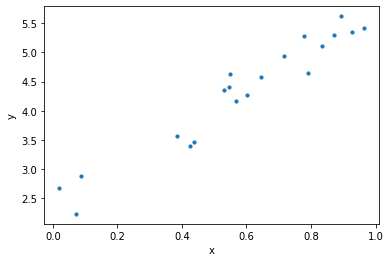

In [23]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# generate random data-set
np.random.seed(0)
x = np.random.rand(20, 1)
y = 2 + 3 * x + np.random.rand(20, 1)
# plot
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [21]:
# sckit-learn implementation
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)



Now we have the output predicted in the varibale y_predicted

Slope: [[3.36179635]]
Intercept: [2.3574411]
Root mean squared error:  0.06221127700282908
R2 score:  0.9325695252942674


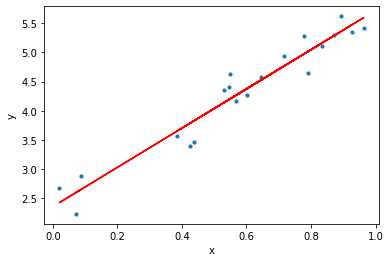

In [22]:
# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse) # root mean square error
print('R2 score: ', r2) #coefficiant for determination

# plotting values

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

For polynomial regression we have to change the model as,

![Polynomial model](Images/poly_model.png)

Polynomial is just with 2 axis but with modified model having polynomial equation thus getting a fit of quadratic for degree 2 and cubic for degree3 and so on

Now in this what will be the case is that for any particular dataset we can use polynomial regression and by increasing the degree we can check the error and select the particular degree for best solution.


0.27238457508666525
0.9042194191184106


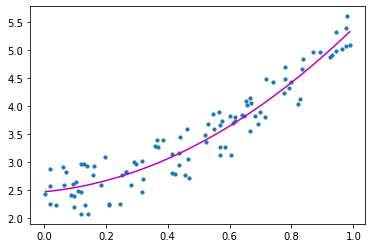

In [51]:
import operator
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# np.random.seed(0)
# x = 2 - 3 * np.random.normal(0, 1, 20)
# y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x*x + np.random.rand(100, 1)
x = x.flatten()
y = y.flatten()
# plot
# plt.scatter(x,y,s=10)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

Now play with the degree in the polynomial function and compare all the outputs.

There you will observe the tradeoff of bias and variance.

![Tradeoff](Images/var_bias.png)

Now think of how to reduce each problem by modifying the code.